# Australian Labour Market Analysis

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import Datasets and exploring the top rows

In [2]:
national_df = pd.read_csv('Cleaned National Labour Market Data.csv', index_col=0, parse_dates=True)
underemployed_df = pd.read_csv('Cleaned Underemployment Labour Market Data.csv', index_col=0, parse_dates=True)
monthly_work_df = pd.read_csv('Cleaned Monthly Hours Worked Data.csv', index_col=0, parse_dates=True)

## 3. Data Exploration

### 3.1 Employment Change from 1978 to 2020

### 3.1.1 Overall Employment Change                     

In [3]:
 def Employment_Change(df, column):
    plt.figure(figsize=(12,5))
    ax = df[column].plot()
    plt.plot(df[column].index[-1], df[column][-1], color='purple', marker='o')
    plt.annotate('current figure', xy=(df[column].index[-1], df[column][-1]))
    #horizontal line represent average value in April
    h = df[df['Month']==4][column].mean()
    ax.axhline(h, color='purple', linewidth=1, linestyle='dashed', label='April Average')
    # Remove top and right borders
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    plt.title('Change in ' + column + ' from 1978 to 2020', size=20)
    plt.show()

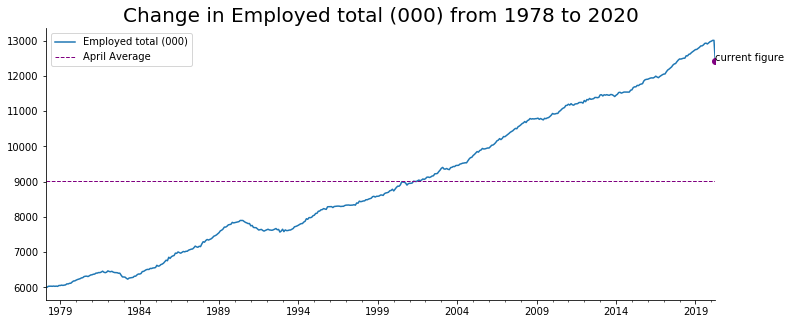

In [4]:
Employment_Change(national_df, 'Employed total (000)')

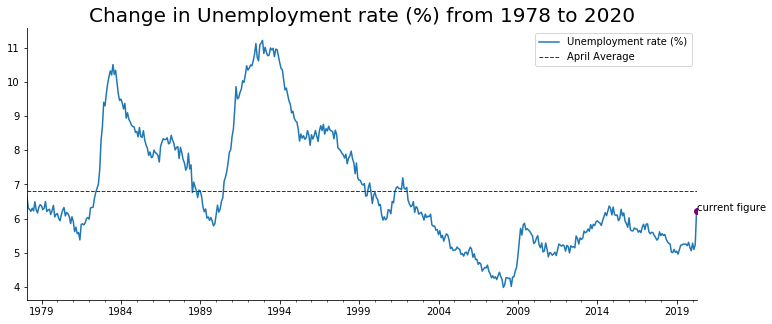

In [5]:
Employment_Change(national_df, 'Unemployment rate (%)')

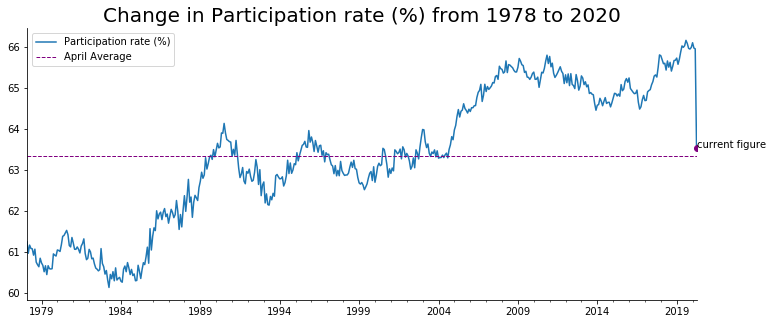

In [6]:
Employment_Change(national_df, 'Participation rate (%)')

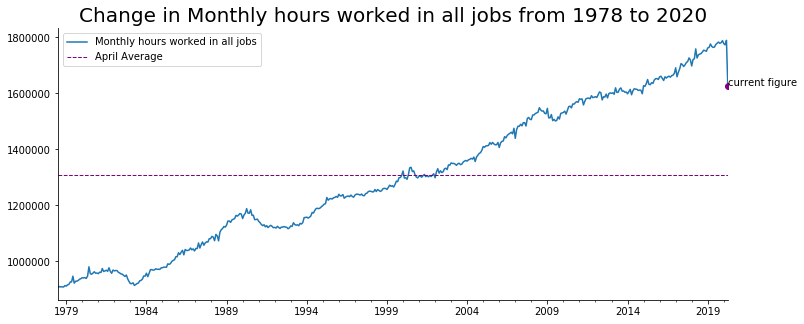

In [7]:
Employment_Change(monthly_work_df, 'Monthly hours worked in all jobs')

The four graphs above have shown the overall employment change from Jan 1978 to April 2020 in regards to employed population, unemployment rate, participation rate and monthly hours worked in all jobs. Given that the data we used are seasonally adjuestedt, it removed the functuation caused by seasonal factors. Overall, the employed population, participation rate and monthly hours worked saw a gradual increase with regular fluctuation, before a sharp drop during the current pandemic. The current participation rate has dropped to the April average. Similarly, unemployment rate has fluctuated dramatically during the years, peaked at 1984 and 1994. With the current pandemic, we also see the unemployment rate raise largely. 

### 3.1.2 Overal Change in Underemployment

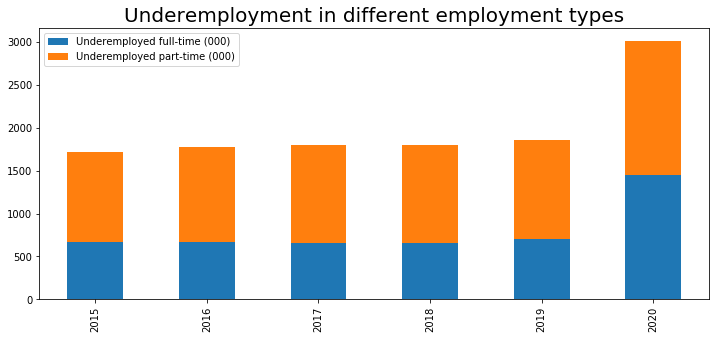

In [8]:
april_underemployed_df = underemployed_df[underemployed_df['Month']==4]
ax = april_underemployed_df[['Underemployed full-time (expanded analytical series) (000)', 
                       'Underemployed part-time (expanded analytical series) (000)']].plot(kind='bar', 
                        stacked=True, figsize=(12,5))
fig = ax.get_figure()
plt.title('Underemployment in different employment types', size=20)
x = np.arange(len(april_underemployed_df.index))
plt.xticks(x, labels=('2015', '2016', '2017', '2018', '2019', '2020'))
plt.legend(loc="upper left", labels = ['Underemployed full-time (000)', 'Underemployed part-time (000)'])
plt.show()

### 3.1.3 Overall Change in Monthly Hours Worked

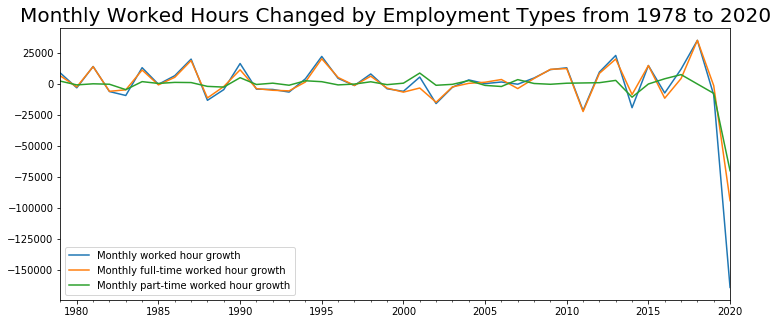

In [9]:
april_work_df = monthly_work_df[monthly_work_df['Month']==4]
plt.figure(figsize=(12,5))
april_work_df['Monthly worked hour growth'].plot()
april_work_df['Monthly full-time worked hour growth'].plot()
april_work_df['Monthly part-time worked hour growth'].plot()
plt.title('Monthly Worked Hours Changed by Employment Types from 1978 to 2020', size=20)
plt.legend(loc="best")
plt.show()

### 3.1.4 Correlation between Unemployment rate and Employment to population ratio

Text(27.125, 0.5, 'Employment to population ratio (%)')

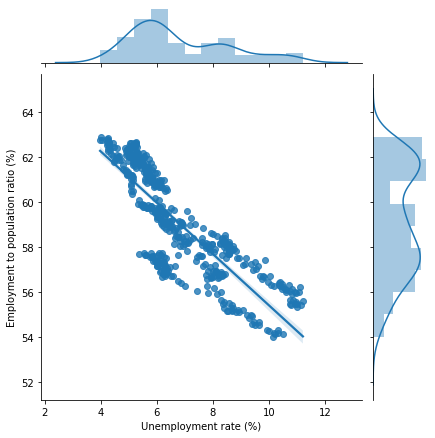

In [10]:
sns.jointplot(x=['Unemployment rate (%)'], y = ['Employment to population ratio (%)'], data = national_df, kind='reg')
plt.xlabel('Unemployment rate (%)')
plt.ylabel('Employment to population ratio (%)')


### 3.2 Employment Change Over Last 10 Years

In [11]:
def Decade_Change(df, column1, column2, column3, column4, factor):
    recent_df = df['2010-01-01': '2020-04-01']
    april_df = recent_df[recent_df['Month']==4]
    
    plt.figure(figsize=(12,5))
    barwidth =0.2

    bar1 = april_df[column1]
    bar2 = april_df[column2]
    bar3 = april_df[column3]
    bar4 = april_df[column4]

    # Set position of bar on x axis
    r1 = np.arange(len(bar1))
    r2 = [x + barwidth for x in r1]
    r3 = [x + barwidth for x in r2]
    r4 = [x + barwidth for x in r3]

    # Make the plot
    plt.figure(figsize=(12, 5))
    plt.bar(r1, bar1, color='#0a67ad', width=barwidth, edgecolor='white', label= column1)
    plt.bar(r2, bar2, color='#3a85bd', width=barwidth, edgecolor='white', label= column2)
    plt.bar(r3, bar3, color='#6ca3cd', width=barwidth, edgecolor='white', label= column3)
    plt.bar(r4, bar4, color='#9dc2de', width=barwidth, edgecolor='white', label= column4)
    
    # Add xticks on the middle of the group bars
    plt.xticks([r + barwidth for r in range(len(bar1))], april_df['Year'])

    plt.title( 'Employment Change by '+ factor + ' from 2010 to 2020', size=20)
    plt.legend(loc="upper left")
    plt.show()

<Figure size 864x360 with 0 Axes>

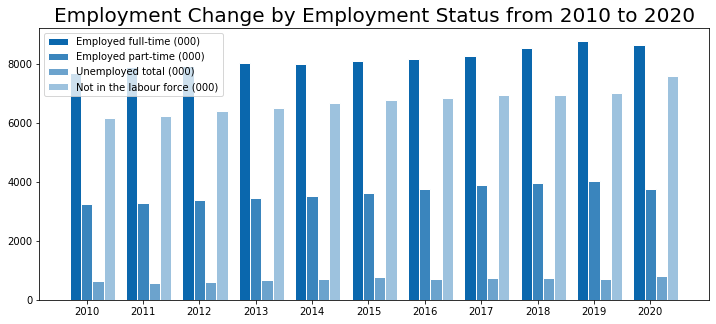

In [12]:
Decade_Change(national_df, 'Employed full-time (000)', 'Employed part-time (000)', 'Unemployed total (000)', 
              'Not in the labour force (000)', 'Employment Status')

<Figure size 864x360 with 0 Axes>

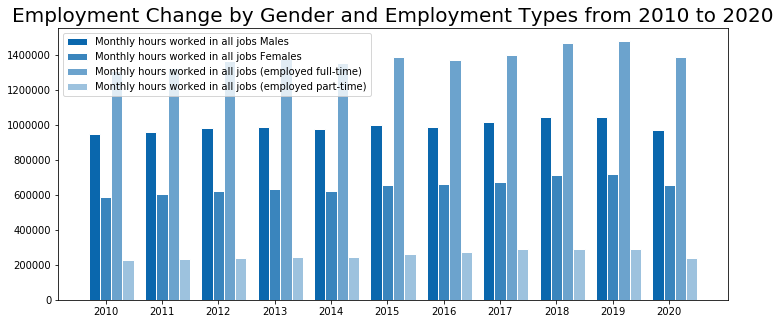

In [13]:
Decade_Change(monthly_work_df, 'Monthly hours worked in all jobs Males', 'Monthly hours worked in all jobs Females', 'Monthly hours worked in all jobs (employed full-time)', 'Monthly hours worked in all jobs (employed part-time)', 'Gender and Employment Types')

### 3.3 Current Employment Situation

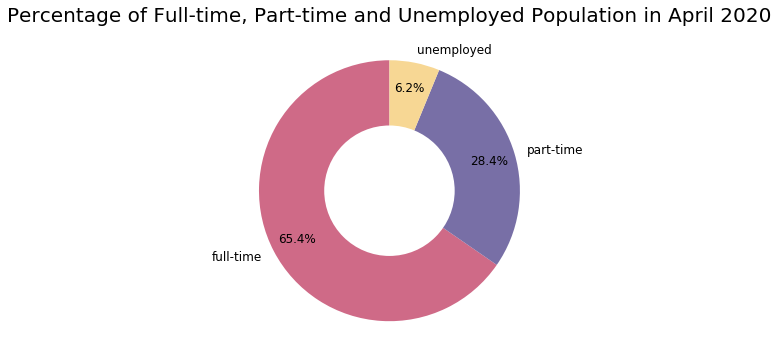

In [14]:
current_df= national_df.iloc[-1]
labels = 'full-time', 'part-time', 'unemployed'

sizes=[current_df['Employed full-time (000)'], current_df['Employed part-time (000)'], current_df['Unemployed total (000)']]
custom_colours = ['#cf6a87', '#786fa6', '#f7d794']
#explode=(0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, textprops={'fontsize':12}, autopct='%1.1f%%', shadow=False, 
        startangle=90, colors=custom_colours, pctdistance=0.8)

#draw circle
centre_circle = plt.Circle((0, 0), radius=0.5, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Percentage of Full-time, Part-time and Unemployed Population in April 2020', size=20)
plt.show()

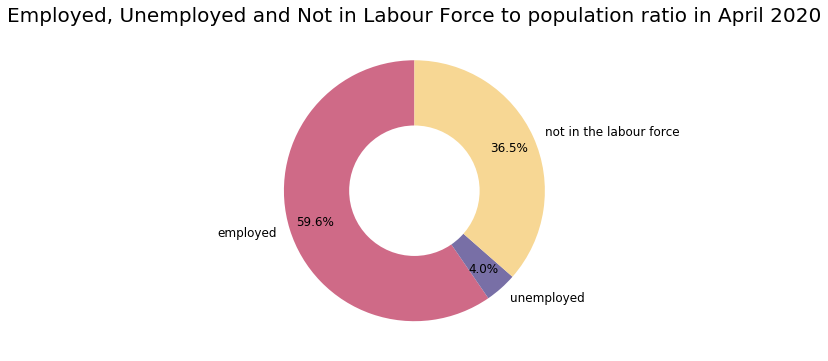

In [15]:
labels = 'employed', 'unemployed', 'not in the labour force'

sizes=[current_df['Employed total (000)'], current_df['Unemployed total (000)'], current_df['Not in the labour force (000)']]
custom_colours = ['#cf6a87', '#786fa6', '#f7d794']
#explode=(0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, textprops={'fontsize':12}, autopct='%1.1f%%', shadow=False, 
        startangle=90, colors=custom_colours, pctdistance=0.8)

#draw circle
centre_circle = plt.Circle((0, 0), radius=0.5, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Employed, Unemployed and Not in Labour Force to population ratio in April 2020', size=20)
plt.show()

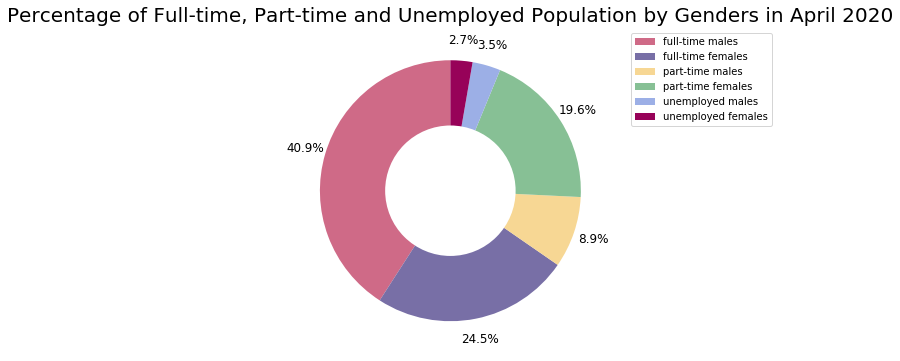

In [16]:
labels = 'full-time males', 'full-time females', 'part-time males', 'part-time females', 'unemployed males', 'unemployed females'

sizes=[current_df['Employed full-timeMales (000)'], current_df['Employed full-timeFemales (000)'], 
       current_df['Employed part-timeMales (000)'], current_df['Employed part-timeFemales (000)'], 
       current_df['Unemployed totalMales (000)'], current_df['Unemployed totalFemales (000)']]
custom_colours = ['#cf6a87', '#786fa6', '#f7d794', '#87C095', '#9CAFE6', '#970259']
#explode=(0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, textprops={'fontsize':12}, autopct='%1.1f%%', shadow=False, 
        startangle=90, colors=custom_colours, pctdistance=1.16)
plt.legend(labels, loc="upper right", bbox_to_anchor = (1.5,1))
#draw circle
centre_circle = plt.Circle((0, 0), radius=0.5, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Percentage of Full-time, Part-time and Unemployed Population by Genders in April 2020', size=20)
plt.show()

Text(0.5, 1.0, 'Hours Worked in Each State in April 2020')

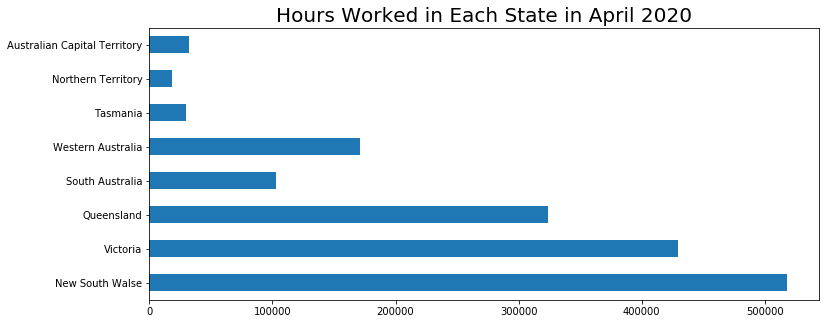

In [17]:
current_workhour= monthly_work_df.iloc[-1]
state_workhours = current_workhour.filter(items = ['Monthly hours worked in all jobs New South Wales', 'Monthly hours worked in all jobs Victoria', 
          'Monthly hours worked in all jobs Queensland', 'Monthly hours worked in all jobs South Australia', 
          'Monthly hours worked in all jobs Western Australia', 'Monthly hours worked in all jobs Tasmania', 
          'Monthly hours worked in all jobs Northern Territory ;', 'Monthly hours worked in all jobs Australian Capital Territory ;'])
plt.figure(figsize=(12,5))
state_workhours.plot(kind = 'barh')
plt.yticks(ticks = np.arange (8), labels = ['New South Walse', 'Victoria', 'Queensland', 'South Australia', 'Western Australia', 
                                             'Tasmania', 'Northern Territory', 'Australian Capital Territory'])
plt.title('Hours Worked in Each State in April 2020', size=20)

Text(0.5, 1.0, 'Underemployment for each age group in April 2020')

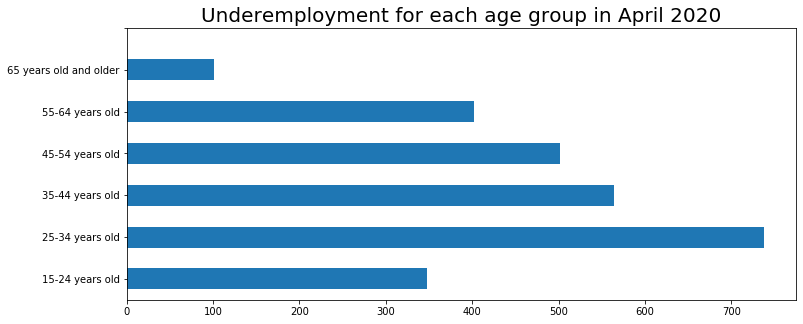

In [18]:
current_underemployed= underemployed_df.iloc[-1]
underemployment_agegroup = current_underemployed.filter(items = ['15-24 years Underemployed total (expanded analytical series) Females(000)', 
        '25-34 years Underemployed total (expanded analytical series) (000)', '35-44 years Underemployed total (expanded analytical series) (000)', 
        '45-54 years Underemployed total (expanded analytical series) (000)', '55-64 years Underemployed total (expanded analytical series) (000)', 
        '65 years and over Underemployed total (expanded analytical series) (000)'])
plt.figure(figsize=(12,5))
underemployment_agegroup.plot(kind = 'barh')
plt.yticks(ticks = np.arange (7), labels = ['15-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', 
                                             '55-64 years old', '65 years old and older'])
plt.title('Underemployment for each age group in April 2020', size=20)

Text(0.5, 1.0, 'Different reasons caused underemployment in April 2020')

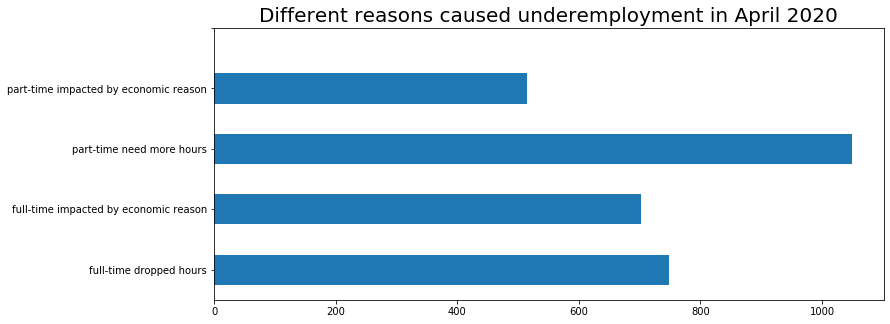

In [19]:
current_underemployed= underemployed_df.iloc[-1]
underemployment_reason = current_underemployed.filter(items = ['Underemployed full-time (worked part-time for economic reasons) (000)', 
        'Underemployed full-time (prefer more hours) (000)', 'Underemployed part-time (prefer more hours) (000)', 
        'Underemployed part-time (worked less than usual hours for economic reasons) (000)'])
plt.figure(figsize=(12,5))
underemployment_reason.plot(kind = 'barh')
plt.yticks(ticks = np.arange (5), labels = ['full-time dropped hours', 'full-time impacted by economic reason', 
                                            'part-time need more hours', 'part-time impacted by economic reason'])
plt.title('Different reasons caused underemployment in April 2020', size=20)